In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


from sklearn.cluster import AgglomerativeClustering
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score
from sklearn.metrics import davies_bouldin_score
from sklearn.metrics import calinski_harabasz_score

from scipy.cluster.hierarchy import dendrogram


In [2]:
df = pd.read_csv("../wine-clustering.csv")

In [3]:
df.head()

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [4]:
df.shape

(178, 13)

In [5]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Alcohol,178.0,13.000618,0.811827,11.03,12.3625,13.050,13.6775,14.83
Malic_Acid,178.0,2.336348,1.117146,0.74,1.6025,1.865,3.0825,5.80
Ash,178.0,2.366517,0.274344,1.36,2.2100,2.360,2.5575,3.23
Ash_Alcanity,178.0,19.494944,3.339564,10.60,17.2000,19.500,21.5000,30.00
Magnesium,178.0,99.741573,14.282484,70.00,88.0000,98.000,107.0000,162.00
Total_Phenols,178.0,2.295112,0.625851,0.98,1.7425,2.355,2.8000,3.88
Flavanoids,178.0,2.029270,0.998859,0.34,1.2050,2.135,2.8750,5.08
Nonflavanoid_Phenols,178.0,0.361854,0.124453,0.13,0.2700,0.340,0.4375,0.66
Proanthocyanins,178.0,1.590899,0.572359,0.41,1.2500,1.555,1.9500,3.58
Color_Intensity,178.0,5.058090,2.318286,1.28,3.2200,4.690,6.2000,13.00


In [6]:
scaler = StandardScaler()

In [7]:
scaled_df = scaler.fit_transform(df)

In [8]:
model = AgglomerativeClustering()

In [9]:
cluster_labels = model.fit_predict(scaled_df)

In [10]:
df['labels'] = cluster_labels

In [11]:
df.head()

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline,labels
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065,0
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050,0
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185,0
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480,0
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735,0


In [12]:
sil_scores = []
dav_scores = []
cal_scores = []
for i in range(2,10):   
    model = AgglomerativeClustering(n_clusters=i,linkage='single')
    cluster_labels = model.fit_predict(scaled_df)
    df['labels'] = cluster_labels
    sil_scores.append(silhouette_score(scaled_df,cluster_labels))
    dav_scores.append(davies_bouldin_score(scaled_df,cluster_labels))
    cal_scores.append(calinski_harabasz_score(scaled_df,cluster_labels))

    model = AgglomerativeClustering(n_clusters=i,linkage='complete')
    cluster_labels = model.fit_predict(scaled_df)
    df['labels'] = cluster_labels
    sil_scores.append(silhouette_score(scaled_df,cluster_labels))
    dav_scores.append(davies_bouldin_score(scaled_df,cluster_labels))
    cal_scores.append(calinski_harabasz_score(scaled_df,cluster_labels))


    model = AgglomerativeClustering(n_clusters=i,linkage='average')
    cluster_labels = model.fit_predict(scaled_df)
    df['labels'] = cluster_labels
    sil_scores.append(silhouette_score(scaled_df,cluster_labels))
    dav_scores.append(davies_bouldin_score(scaled_df,cluster_labels))
    cal_scores.append(calinski_harabasz_score(scaled_df,cluster_labels))


    model = AgglomerativeClustering(n_clusters=i,linkage='ward')
    cluster_labels = model.fit_predict(scaled_df)
    df['labels'] = cluster_labels
    sil_scores.append(silhouette_score(scaled_df,cluster_labels))
    dav_scores.append(davies_bouldin_score(scaled_df,cluster_labels))
    cal_scores.append(calinski_harabasz_score(scaled_df,cluster_labels))


In [13]:
print(F"Best Silhoutte Scores : {max(sil_scores)} ")
print(F"Best Davies Bouldin Scores : {max(dav_scores)} ")
print(F"Best Calinski Harabasz Scores : {max(cal_scores)} ")

Best Silhoutte Scores : 0.2774439826952265 
Best Davies Bouldin Scores : 2.014632487689055 
Best Calinski Harabasz Scores : 67.6474675044098 


In [14]:
def plot_dendrogram(model, **kwargs):
    # Create linkage matrix and then plot the dendrogram

    # create the counts of samples under each node
    counts = np.zeros(model.children_.shape[0])
    n_samples = len(model.labels_)
    for i, merge in enumerate(model.children_):
        current_count = 0
        for child_idx in merge:
            if child_idx < n_samples:
                current_count += 1  # leaf node
            else:
                current_count += counts[child_idx - n_samples]
        counts[i] = current_count

    linkage_matrix = np.column_stack(
        [model.children_, model.distances_, counts]
    ).astype(float)

    # Plot the corresponding dendrogram
    dendrogram(linkage_matrix, **kwargs)

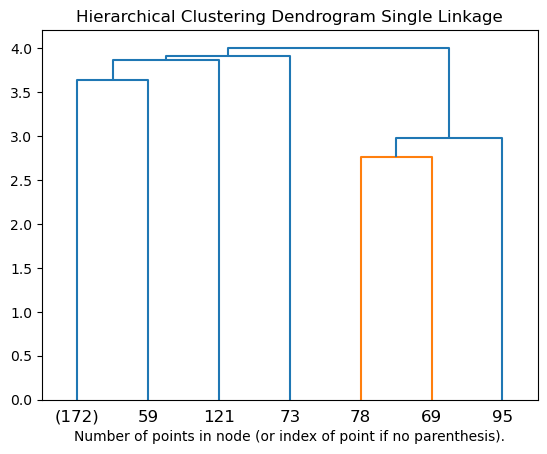

In [15]:
model = AgglomerativeClustering(linkage='single',compute_distances=True)
model.fit(scaled_df)

plt.title("Hierarchical Clustering Dendrogram Single Linkage")
# plot the top three levels of the dendrogram
plot_dendrogram(model, truncate_mode="level", p=3)
plt.xlabel("Number of points in node (or index of point if no parenthesis).")
plt.show()

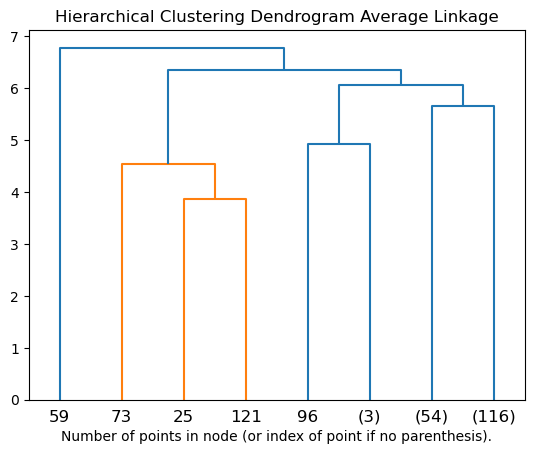

In [16]:
model = AgglomerativeClustering(linkage='average',compute_distances=True)
model.fit(scaled_df)

plt.title("Hierarchical Clustering Dendrogram Average Linkage")
# plot the top three levels of the dendrogram
plot_dendrogram(model, truncate_mode="level", p=3)
plt.xlabel("Number of points in node (or index of point if no parenthesis).")
plt.show()

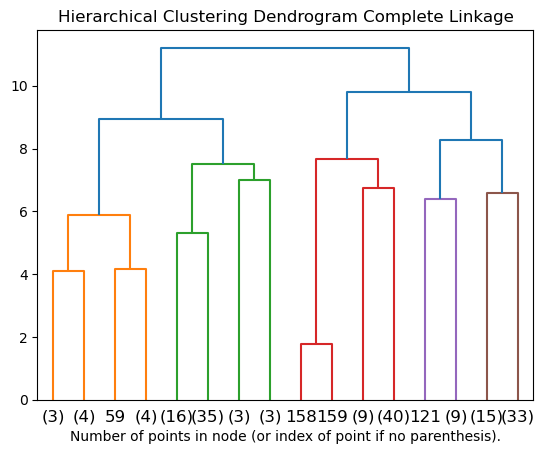

In [17]:
model = AgglomerativeClustering(linkage='complete',compute_distances=True)
model.fit(scaled_df)

plt.title("Hierarchical Clustering Dendrogram Complete Linkage")
# plot the top three levels of the dendrogram
plot_dendrogram(model, truncate_mode="level", p=3)
plt.xlabel("Number of points in node (or index of point if no parenthesis).")
plt.show()

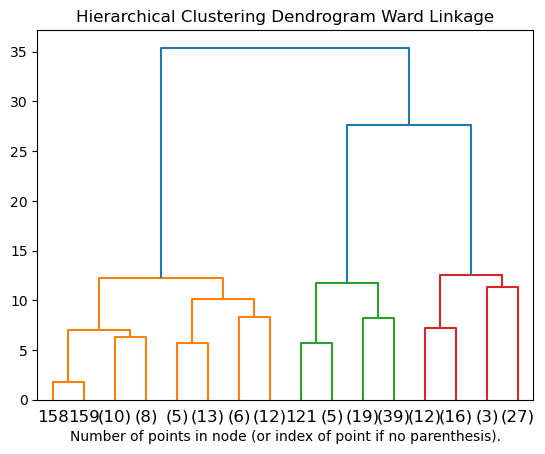

In [18]:
model = AgglomerativeClustering(linkage='ward',compute_distances=True)
model.fit(scaled_df)

plt.title("Hierarchical Clustering Dendrogram Ward Linkage")
# plot the top three levels of the dendrogram
plot_dendrogram(model, truncate_mode="level", p=3)
plt.xlabel("Number of points in node (or index of point if no parenthesis).")
plt.show()